# Project Members
## Sameer Ahamed Rizwan Basha
## Peter Utomakili
## Adejoke Adeoye

In [2]:
#importing the required libraries
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing the numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib for plotting graphs
import matplotlib  # Importing the matplotlib library for creating visualizations
import seaborn as sns  # Importing the seaborn library for enhanced data visualization
import folium  # Importing the folium library for creating interactive maps
import geopandas as gpd  # Importing the geopandas library for geospatial data operations
from sklearn.model_selection import LeaveOneGroupOut  # Importing LeaveOneGroupOut for cross-validation
from sklearn.metrics import mean_squared_error, r2_score  # Importing metrics for model evaluation
from sklearn.neighbors import RadiusNeighborsRegressor  # Importing RadiusNeighborsRegressor for neighborhood-based regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Importing functions for splitting data, parameter tuning, and evaluating model performance
from sklearn.tree import DecisionTreeRegressor  # Importing DecisionTreeRegressor for decision tree regression models
from sklearn.linear_model import LinearRegression, Lasso  # Importing Linear and Lasso regression models
from sklearn.svm import SVR  # Importing Support Vector Regression model
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for random forest regression models
%matplotlib inline  # Configuring matplotlib to show plots inline in a Jupyter notebook


UsageError: unrecognized arguments: # Configuring matplotlib to show plots inline in a Jupyter notebook


Made the ID_LATITUDE_LONGITUDE_YEAR_WEEK column as the index as it contains unique values

In [3]:
#loading the train dataset
train_data = pd.read_csv("../dataset/CO2 Emmisions in Rawanda/train.csv", index_col='ID_LAT_LON_YEAR_WEEK')
train_data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


### Data Inspection

In [4]:
train_data.shape  # Getting the shape (number of rows and columns) of the train_data dataframe.

(79023, 75)

In [5]:
train_data.info()  # Displaying a concise summary of the train_data dataframe, including the number of non-null entries for each column.

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

In [6]:
df_describe = train_data.describe()

In [7]:
# Below is a block of code for checking and counting missing records in each column of the dataframe.
train_data_null = {}  # Initializing an empty dictionary to store the count of null values for each column.
for i in train_data.columns:  # Iterating over each column in the train_data dataframe.
    train_data_null[i] = train_data[i].isnull().sum()  # Counting the number of null values in each column and storing it in the dictionary.

train_data_null  # Displaying the dictionary containing the count of null values for each column.

{'latitude': 0,
 'longitude': 0,
 'year': 0,
 'week_no': 0,
 'SulphurDioxide_SO2_column_number_density': 14609,
 'SulphurDioxide_SO2_column_number_density_amf': 14609,
 'SulphurDioxide_SO2_slant_column_number_density': 14609,
 'SulphurDioxide_cloud_fraction': 14609,
 'SulphurDioxide_sensor_azimuth_angle': 14609,
 'SulphurDioxide_sensor_zenith_angle': 14609,
 'SulphurDioxide_solar_azimuth_angle': 14609,
 'SulphurDioxide_solar_zenith_angle': 14609,
 'SulphurDioxide_SO2_column_number_density_15km': 14609,
 'CarbonMonoxide_CO_column_number_density': 2122,
 'CarbonMonoxide_H2O_column_number_density': 2122,
 'CarbonMonoxide_cloud_height': 2122,
 'CarbonMonoxide_sensor_altitude': 2122,
 'CarbonMonoxide_sensor_azimuth_angle': 2122,
 'CarbonMonoxide_sensor_zenith_angle': 2122,
 'CarbonMonoxide_solar_azimuth_angle': 2122,
 'CarbonMonoxide_solar_zenith_angle': 2122,
 'NitrogenDioxide_NO2_column_number_density': 18320,
 'NitrogenDioxide_tropospheric_NO2_column_number_density': 18320,
 'NitrogenDio

In [73]:
#checking for the data type of all the columns
train_data_type = {}
i = 0
for i in train_data.columns:
    train_data_type[i] = train_data[i].dtypes

train_data_type

{'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'year': dtype('int64'),
 'week_no': dtype('int64'),
 'SulphurDioxide_SO2_column_number_density': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_amf': dtype('float64'),
 'SulphurDioxide_SO2_slant_column_number_density': dtype('float64'),
 'SulphurDioxide_cloud_fraction': dtype('float64'),
 'SulphurDioxide_sensor_azimuth_angle': dtype('float64'),
 'SulphurDioxide_sensor_zenith_angle': dtype('float64'),
 'SulphurDioxide_solar_azimuth_angle': dtype('float64'),
 'SulphurDioxide_solar_zenith_angle': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_15km': dtype('float64'),
 'CarbonMonoxide_CO_column_number_density': dtype('float64'),
 'CarbonMonoxide_H2O_column_number_density': dtype('float64'),
 'CarbonMonoxide_cloud_height': dtype('float64'),
 'CarbonMonoxide_sensor_altitude': dtype('float64'),
 'CarbonMonoxide_sensor_azimuth_angle': dtype('float64'),
 'CarbonMonoxide_sensor_zenith_angle': dtype('float

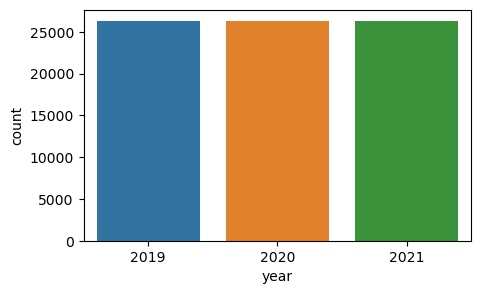

In [74]:
# Understanding the spread of data with respect to years
plt.figure(figsize= (5,3))
sns.countplot(x="year", data = train_data)
plt.show()

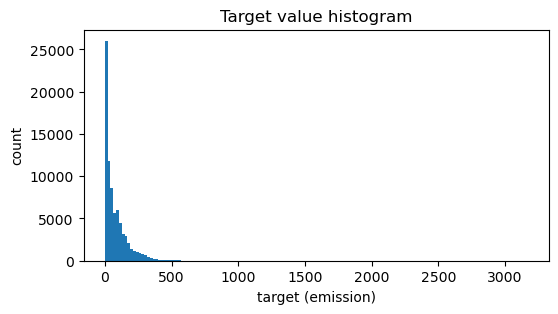

In [76]:
# Distribution of the Target Value over all the years

plt.figure(figsize=(6, 3))
plt.hist(train_data.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

Skewed Distribution: The histogram shows a right-skewed distribution, meaning that most of the data points fall on the left side of the histogram. This indicates that lower emissions are more common than higher emissions in this dataset.

Range of Values: The x-axis, which represents the target variable (emission), ranges from 0 to just over 3000. However, the majority of the data is concentrated in the first bin, which indicates that a large number of records have emission values close to 0.

Frequency of Occurrences: The y-axis shows the count of occurrences (frequency) for each bin. The tallest bar is at the far left of the histogram, which suggests that the most frequent emission values are very low, close to zero.

### Data cleaning, preparation and training

### Approach 1 - Feature selection and Evaluation Approach

In [79]:
# df_v1 contains the Latitude and Longitude columns for EDA

# Selecting the columns to merge into a new DataFrame
df_v1 = train_data[['latitude', 'longitude']].copy()

# Convert columns to string and merge them
df_v1['LAT_LON'] = df_v1['latitude'].astype(str) + df_v1['longitude'].astype(str)

# Find Unique Values
unique_values = df_v1['LAT_LON'].unique()

# Print Length of the unique values
print(f' There are {len(unique_values)} unique coordinates from where we took the observation')

 There are 497 unique coordinates from where we took the observation


For every geographical point, there are 159 rows with observations in train and 49 rows in test.
The 159 training rows correspond to three years (2019, 2020, 2021) with 53 weeks each (numbered from 0 to 52).
The 49 test rows correspond to weeks 0 to 48 of 2022.
497 * 3 * 53 = 79023, the size of the training dataset.
497 * 49 = 24353, the size of the test set.

In [8]:
# Taken from https://www.kaggle.com/code/inversion/getting-started-eda

train_coords = train_data.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

We need to handle missing data. As data is missing in train and test, we cannot simply drop rows with missing data, but need to impute the missing values.
As we are working with geographical data, measurements of nearby locations can be used for imputing missing values.
As the data is a time series, measurements of nearby points in time can be used for imputing missing values.

This code below sets up a folium map visualization of mean emission values based on their geographic location. It uses a color normalization to represent different levels of emissions and places a circle marker for each location with the corresponding color on the map.

In [9]:
def rgba_to_hex(color):
    """Convert RGBA color values to a hexadecimal format."""
    red, green, blue, alpha = color  # Unpacking the RGBA color values into separate variables.
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"  # Formatting and returning the hexadecimal color string.

# Group the training data by latitude and longitude, calculate the mean emission for each group, and reset the index to convert it back to a dataframe.
temp = train_data.groupby(['latitude', 'longitude']).emission.mean().reset_index()

# Convert the latitude and longitude to geometric points for mapping.
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

# Define a colormap and a normalizer to map emission values to colors.
cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Initialize a folium map with the prefer_canvas option set to True for better performance with large datasets.
all_data_map = folium.Map(prefer_canvas=True)

# Create a list of [latitude, longitude] pairs for each point in the geodataframe.
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Loop over each pair of coordinates and corresponding emission value.
for coordinates, emission in zip(geo_df_list, temp.emission):
    # Uncomment the print statement for debugging to see emission values and their associated colors.
    # print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    
    # Add a CircleMarker to the map for each location with customized size, border weight, zoom level, and color based on emission.
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius=1,  # Set the radius of the marker.
            weight=4,  # Set the border weight of the marker.
            zoom=10,  # Set the zoom level when the marker is clicked.
            color=rgba_to_hex(cmap(normalizer(np.log1p(emission))))  # Set the color of the marker based on normalized emission value.
        )
    )

# Automatically adjust the map boundaries to fit the bounds of the markers.
all_data_map.fit_bounds(all_data_map.get_bounds())

# Display the map.
all_data_map


There are 7 features we need to compare with the outcome.

* Sulphur Dioxide

* Carbon Monoxide

* Nitrogen Dioxide

* Formaldehyde

* UV Aerosol Index

* Ozone

* Cloud

In the process of developing our machine learning model, we are meticulously examining a range of environmental features to better understand their relationship with our target variable, which is emission levels. Our dataset encompasses seven primary features: Sulphur Dioxide, Carbon Monoxide, Nitrogen Dioxide, Formaldehyde, UV Aerosol Index, Ozone, and Cloud. Each of these primary features is further broken down into various sub-features, providing a more granular view and enabling a thorough analysis.
Our objective is to identify a single, representative feature for each primary feature category that most significantly correlates with emission levels. To achieve this, we are employing heatmaps as a key analytical tool. Heatmaps offer a visual representation of correlation data, making it easier to pinpoint which specific sub-features have the strongest correlations with emissions. By focusing on these highly correlated sub-features, we aim to enhance the predictive accuracy of our machine learning model, ensuring that it is both efficient and effective in predicting emission levels based on environmental factors. This approach allows us to streamline our feature set, reducing complexity while maintaining, or even improving, the model's performance.

In [87]:
features = ["Sulfur Dioxide","Carbon Monoxide","Nitrogen Dioxide","Formaldehyde","Aerosol Content"]

In [93]:
num_rows = train_data.shape[0]
percentage_missing =train_data.isnull().sum()
missing_percent = percentage_missing.reset_index()
missing_percent


missing_percent.columns = ["features", "percent"]
missing_percent['percent'] = missing_percent["percent"].apply(lambda x:( x / len(train_data)) * 100)
missing_percent

,features,percent
0,latitude,0.000000
1,longitude,0.000000
2,year,0.000000
3,week_no,0.000000
4,SulphurDioxide_SO2_column_number_density,18.487023
...,...,...
70,Cloud_sensor_azimuth_angle,0.612480
71,Cloud_sensor_zenith_angle,0.612480
72,Cloud_solar_azimuth_angle,0.612480
73,Cloud_solar_zenith_angle,0.612480


Drop features with over 40% of data missing

In [94]:

data_less_40 = missing_percent.loc[missing_percent['percent'] < 40]

In [95]:
data_less_40

,features,percent
0,latitude,0.000000
1,longitude,0.000000
2,year,0.000000
3,week_no,0.000000
4,SulphurDioxide_SO2_column_number_density,18.487023
...,...,...
70,Cloud_sensor_azimuth_angle,0.612480
71,Cloud_sensor_zenith_angle,0.612480
72,Cloud_solar_azimuth_angle,0.612480
73,Cloud_solar_zenith_angle,0.612480


In [96]:
data_less_40['features'].tolist()

['latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure'

Find the subfeature with the highest correlation with Dependent - column
- 'SulphurDioxide_sensor_azimuth_angle'
- 'CarbonMonoxide_H2O_column_number_density'
- 'NitrogenDioxide_sensor_altitude'
- 'Formaldehyde_tropospheric_HCHO_column_number_density_amf'
- 'UvAerosolIndex_solar_azimuth_angle',
- 'Ozone_solar_azimuth_angle',
- 'Cloud_solar_azimuth_angle',


We have taken these columns as representative each main features.

<Axes: >

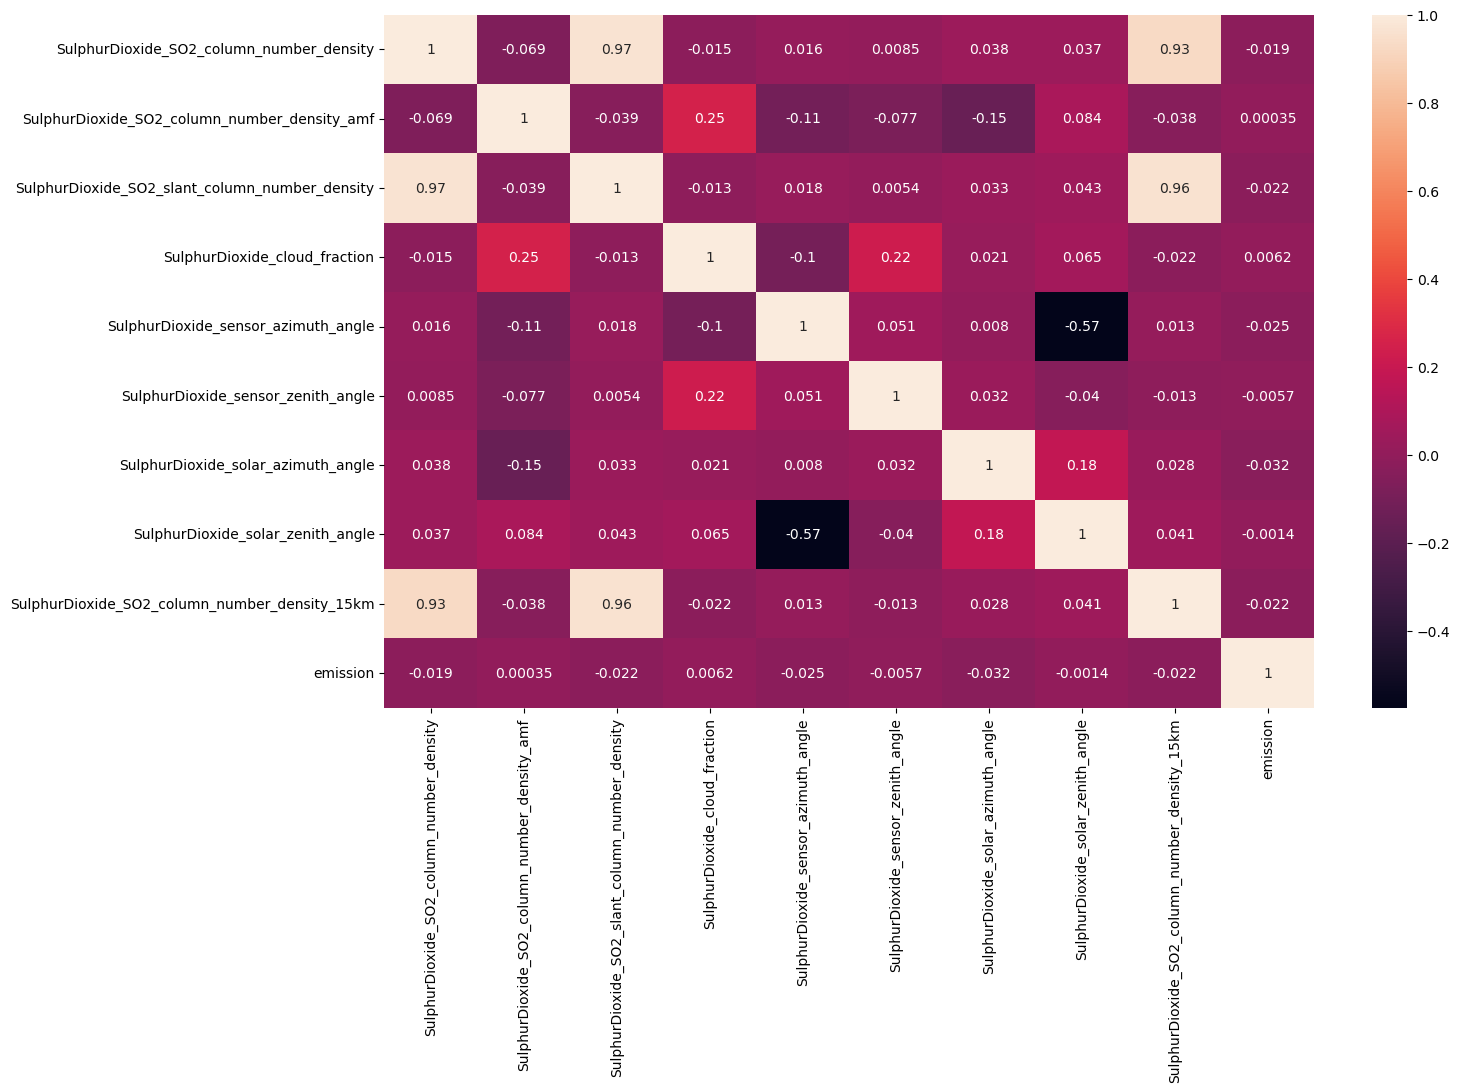

In [98]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km','emission']].corr(), annot=True)

<Axes: >

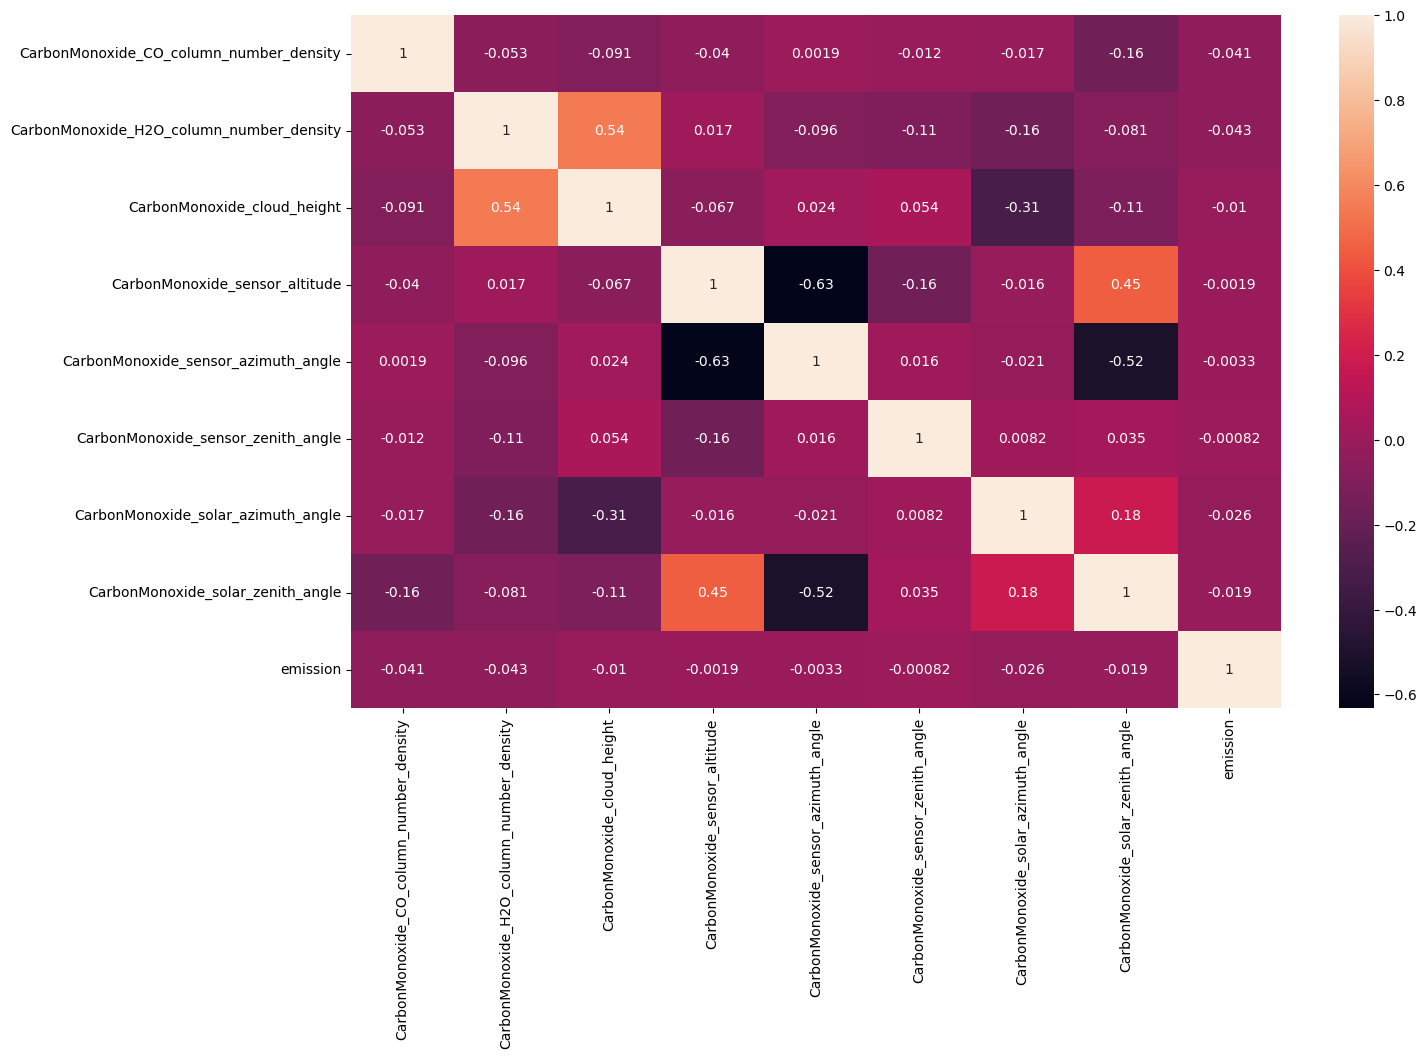

In [99]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[['CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

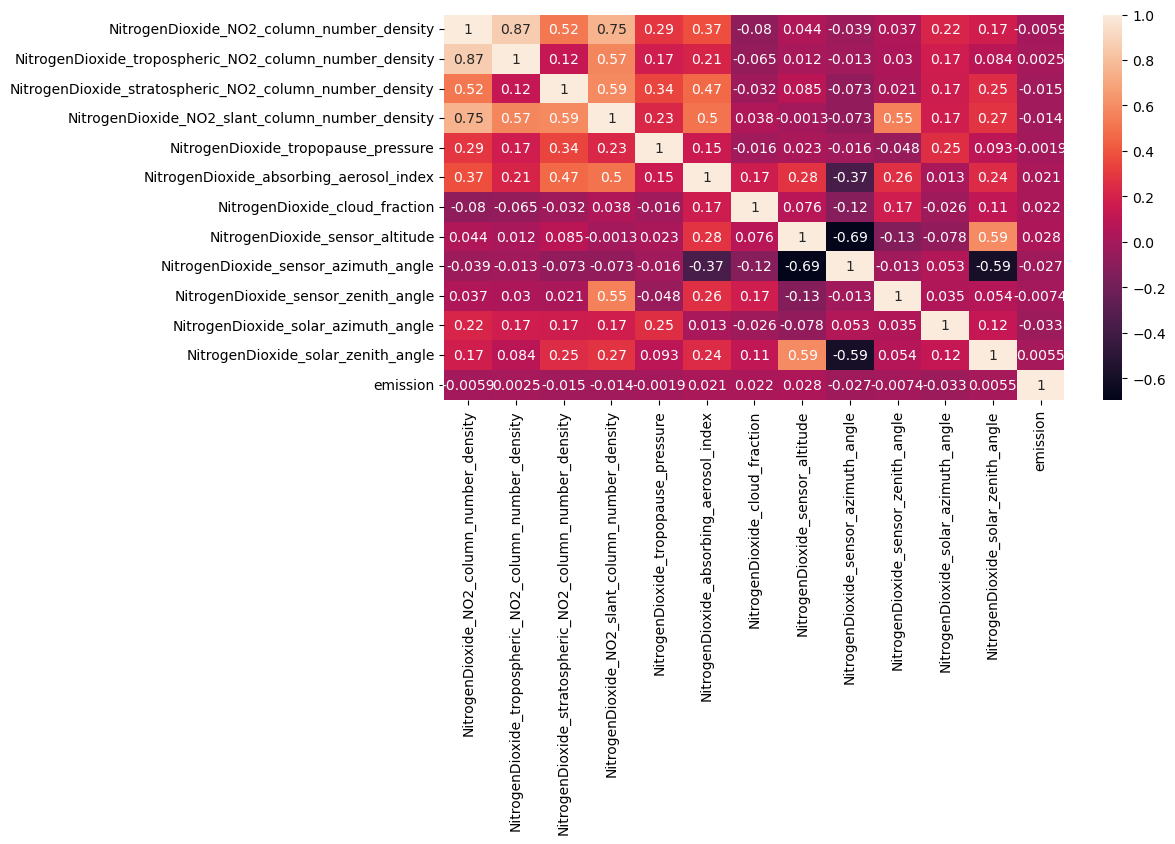

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

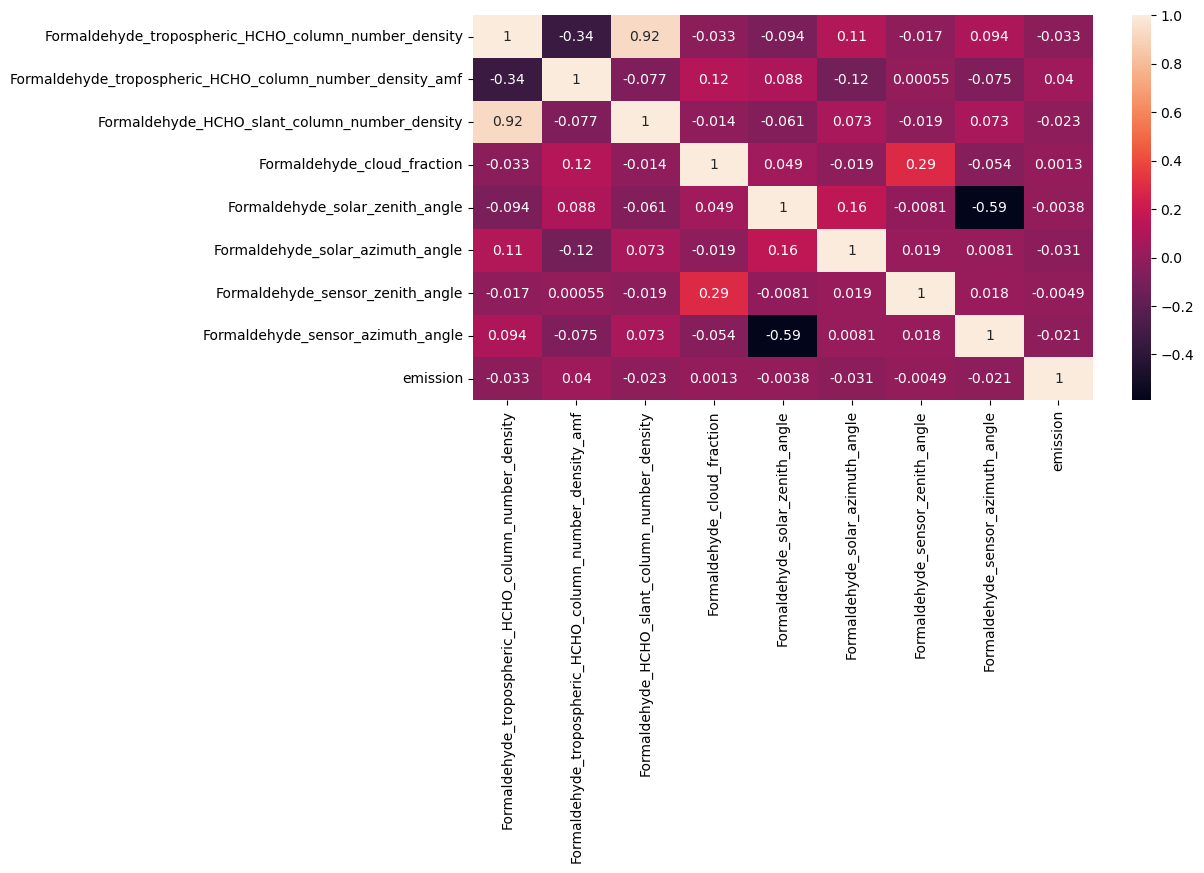

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction',
 'Formaldehyde_solar_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'Formaldehyde_sensor_zenith_angle',
 'Formaldehyde_sensor_azimuth_angle','emission']].corr(), annot=True)

<Axes: >

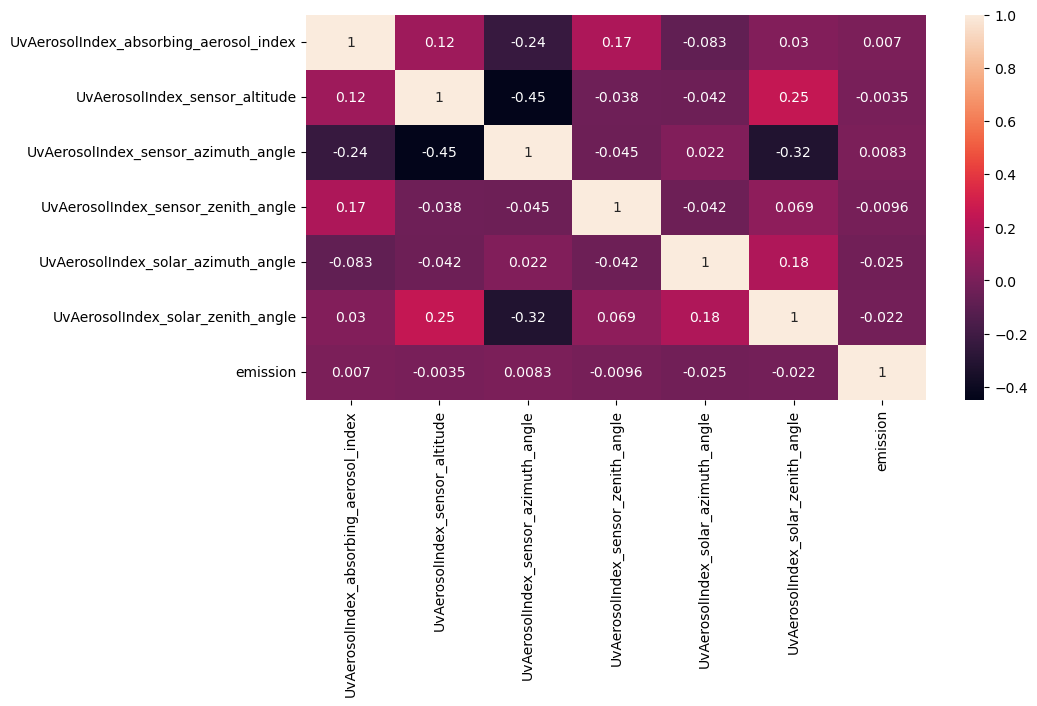

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['UvAerosolIndex_absorbing_aerosol_index',
 'UvAerosolIndex_sensor_altitude',
 'UvAerosolIndex_sensor_azimuth_angle',
 'UvAerosolIndex_sensor_zenith_angle',
 'UvAerosolIndex_solar_azimuth_angle',
 'UvAerosolIndex_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

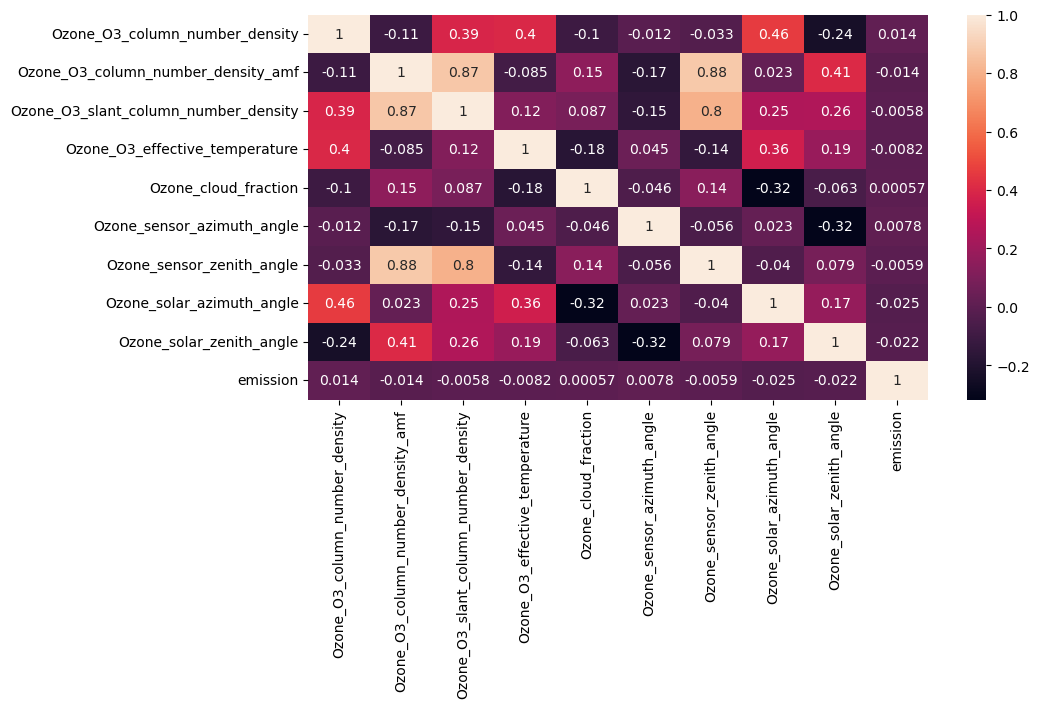

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'Ozone_cloud_fraction',
 'Ozone_sensor_azimuth_angle',
 'Ozone_sensor_zenith_angle',
 'Ozone_solar_azimuth_angle',
 'Ozone_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

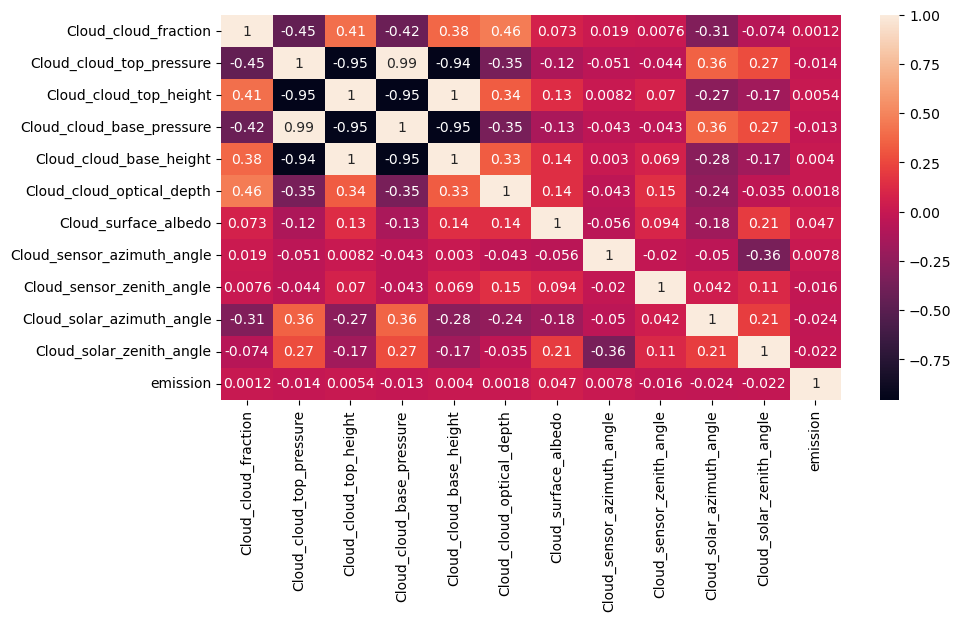

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Cloud_cloud_fraction',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_top_height',
 'Cloud_cloud_base_pressure',
 'Cloud_cloud_base_height',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo',
 'Cloud_sensor_azimuth_angle',
 'Cloud_sensor_zenith_angle',
 'Cloud_solar_azimuth_angle',
 'Cloud_solar_zenith_angle','emission']].corr(), annot=True)

The below are the features we finally selected for this approch

In [12]:
f_feat = ['latitude','longitude','year','week_no','SulphurDioxide_sensor_azimuth_angle','CarbonMonoxide_H2O_column_number_density','NitrogenDioxide_sensor_altitude',
          'Formaldehyde_tropospheric_HCHO_column_number_density_amf','UvAerosolIndex_solar_azimuth_angle','Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle','emission']

In [22]:
# Check missing values in terms of percentages
(train_data[f_feat].isnull().sum() / len(train_data) )* 100

latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_sensor_azimuth_angle                         18.487023
CarbonMonoxide_H2O_column_number_density                     2.685294
NitrogenDioxide_sensor_altitude                             23.183124
Formaldehyde_tropospheric_HCHO_column_number_density_amf     9.208711
UvAerosolIndex_solar_azimuth_angle                           0.682080
Ozone_solar_azimuth_angle                                    0.693469
Cloud_solar_azimuth_angle                                    0.612480
emission                                                     0.000000
dtype: float64

In [15]:
# This column contains the major
co2 = train_data.loc[:,f_feat]

The first four missing columns have a normal distribution, therefore they can be replaced by the mean values

<Axes: >

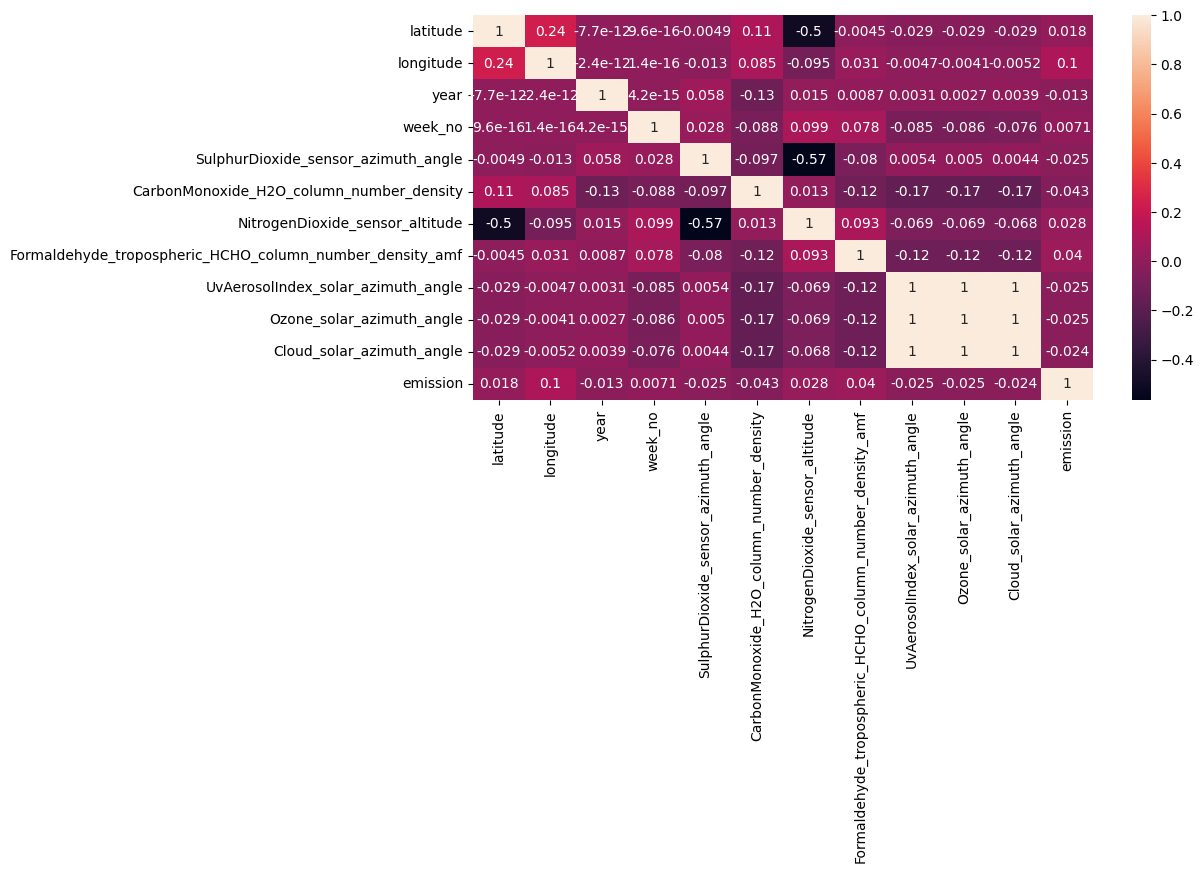

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(co2.corr(), annot=True)

In [17]:
co2.drop(['Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle'], axis=1,inplace=True)

In [18]:
co2.head()

,latitude,longitude,year,week_no,SulphurDioxide_sensor_azimuth_angle,CarbonMonoxide_H2O_column_number_density,NitrogenDioxide_sensor_altitude,Formaldehyde_tropospheric_HCHO_column_number_density_amf,UvAerosolIndex_solar_azimuth_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-98.593887,1589.024536,NaN,0.863230,-138.786446,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,16.592861,1772.574405,829859.960368,1.172826,-142.786141,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,72.795837,2703.236800,829527.125000,1.175467,-135.364627,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,2076.073332,NaN,NaN,-137.489602,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,4.121269,2053.608490,829744.843750,0.869081,-136.448518,4.347317


In [19]:
co2.columns = ['latitude','longitude','year','week_no','sulphur_dioxide','carbon_monoxide','nitrogen_dioxide','formaldehyde','uv_aerosol_index','emission']

In [20]:
co2.head()

,latitude,longitude,year,week_no,sulphur_dioxide,carbon_monoxide,nitrogen_dioxide,formaldehyde,uv_aerosol_index,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-98.593887,1589.024536,NaN,0.863230,-138.786446,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,16.592861,1772.574405,829859.960368,1.172826,-142.786141,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,72.795837,2703.236800,829527.125000,1.175467,-135.364627,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,2076.073332,NaN,NaN,-137.489602,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,4.121269,2053.608490,829744.843750,0.869081,-136.448518,4.347317


In [21]:
# Impute the missing values of our sub features by mean, for those that have standard distribution
co2['sulphur_dioxide'].fillna(np.mean(co2['sulphur_dioxide']),inplace=True)
co2['carbon_monoxide'].fillna(np.mean(co2['carbon_monoxide']),inplace=True)
co2['nitrogen_dioxide'].fillna(np.mean(co2['nitrogen_dioxide']),inplace=True)
co2['formaldehyde'].fillna(np.mean(co2['formaldehyde']),inplace=True)

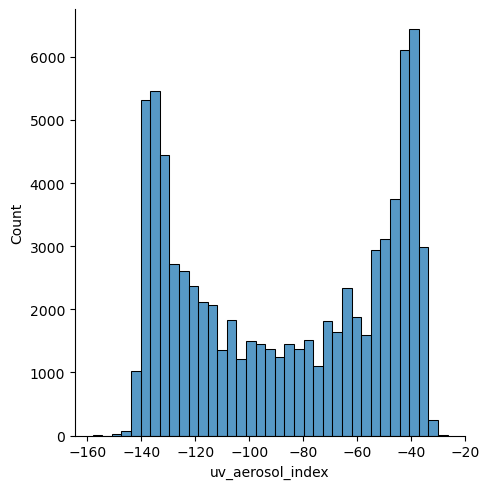

In [117]:
sns.displot(data=co2,x='uv_aerosol_index')

In [118]:
uv_median = co2['uv_aerosol_index'].median()

In [119]:
co2['uv_aerosol_index'].fillna(uv_median,inplace=True)

In [120]:
# Check for any duplicates
co2.duplicated().any()

False

In [121]:
#confirming the missing values
co2.isnull().sum()

latitude            0
longitude           0
year                0
week_no             0
sulphur_dioxide     0
carbon_monoxide     0
nitrogen_dioxide    0
formaldehyde        0
uv_aerosol_index    0
emission            0
dtype: int64

<Axes: >

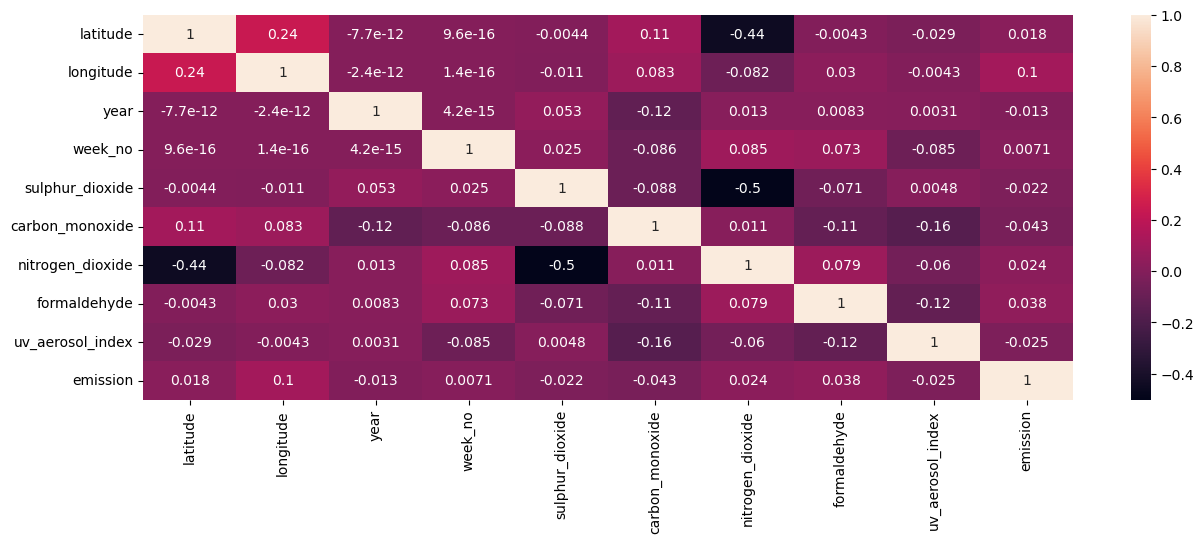

In [122]:
plt.figure(figsize=(15,5))
sns.heatmap(co2.corr(),annot=True)

In [123]:
X = co2.iloc[:, :-1]
Y = co2.iloc[:,-1]
print(X.head(), Y[:5])

                          latitude  longitude  year  week_no  sulphur_dioxide  \
ID_LAT_LON_YEAR_WEEK                                                            
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0       -98.593887   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1        16.592861   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2        72.795837   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3        -7.925870   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4         4.121269   

                          carbon_monoxide  nitrogen_dioxide  formaldehyde  \
ID_LAT_LON_YEAR_WEEK                                                        
ID_-0.510_29.290_2019_00      1589.024536     829994.224471      0.863230   
ID_-0.510_29.290_2019_01      1772.574405     829859.960368      1.172826   
ID_-0.510_29.290_2019_02      2703.236800     829527.125000      1.175467   
ID_-0.510_29.290_2019_03      2076.073332     8

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,random_state=44)

In [36]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse,rmse,r2_square

In [129]:
# train 4 models
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Linear Regression': LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    'SVR': SVR()

}

model_list = []
r2_list = []
adjusted_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_pred = model.predict(X_test)

    mse,rmse,r2_square = evaluate_model(y_test,y_pred)
    Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model training Performance')
    print("Mean Squared Error:",mse)
    print("Root Mean Square Error:",rmse)
    print('R2 Score',r2_square*100)
    print('Adjusted R2 Score',Adj_r2*100)

    r2_list.append(r2_square)
    adjusted_r2_list.append(Adj_r2)
    
    print('='*35)
    print('\n')

Decision Tree
Model training Performance
Mean Squared Error: 446.2940506013852
Root Mean Square Error: 21.125672784585706
R2 Score 97.89239631691515
Adjusted R2 Score 97.89205334448634


Lasso
Model training Performance
Mean Squared Error: 20865.009493270758
Root Mean Square Error: 144.4472550561995
R2 Score 1.46592634080428
Adjusted R2 Score 1.4498917936858313


Linear Regression
Model training Performance
Mean Squared Error: 20856.689741306218
Root Mean Square Error: 144.41845360377675
R2 Score 1.5052159971624235
Adjusted R2 Score 1.4891878436885664


RandomForest
Model training Performance
Mean Squared Error: 329.54675264882263
Root Mean Square Error: 18.153422615276234
R2 Score 98.44373020725821
Adjusted R2 Score 98.44347695393787


SVR
Model training Performance
Mean Squared Error: 22519.658143279215
Root Mean Square Error: 150.06551283782431
R2 Score -6.3480778662201365
Adjusted R2 Score -6.365383993960272




Decision Tree

Model training Performance

Mean Squared Error: 446.2940506013852

Root Mean Square Error: 21.125672784585706

R2 Score 97.89239631691515

Adjusted R2 Score 97.89205334448634

----------------------------

Lasso

Model training Performance

Mean Squared Error: 20865.009493270758

Root Mean Square Error: 144.4472550561995

R2 Score 1.46592634080428

Adjusted R2 Score 1.4498917936858313

-------------------------------------

Linear Regression

Model training Performance

Mean Squared Error: 20856.689741306218

Root Mean Square Error: 144.41845360377675

R2 Score 1.5052159971624235

Adjusted R2 Score 1.4891878436885664

------------------------------------------------

RandomForest

Model training Performance

Mean Squared Error: 329.54675264882263

Root Mean Square Error: 18.153422615276234

R2 Score 98.44373020725821

Adjusted R2 Score 98.44347695393787

----------------------------------------------------------------

SVR

Model training Performance

Mean Squared Error: 22519.658143279215

Root Mean Square Error: 150.06551283782431

R2 Score -6.3480778662201365

Adjusted R2 Score -6.365383993960272

### Approach 2 - Time Series

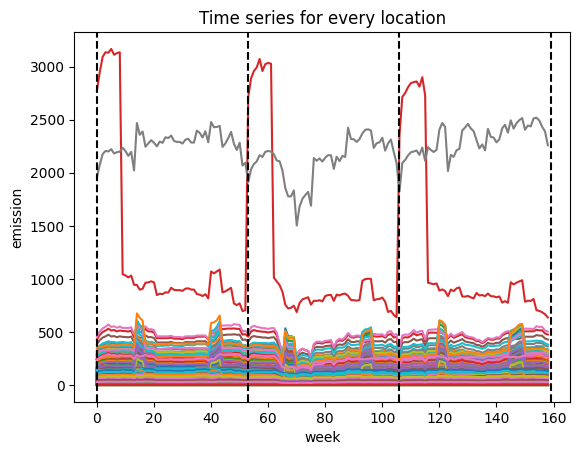

In [ ]:
# Loop through each unique pair of latitude and longitude in the train_data dataframe.
for ll in train_data[['latitude', 'longitude']].drop_duplicates().iterrows():
    # For each unique location, select the corresponding emission time series.
    time_series = train_data[(train_data.latitude == ll[1].latitude) & (train_data.longitude == ll[1].longitude)].emission
    # Plot the time series data for each location.
    plt.plot(range(len(time_series)), time_series)

# Set the title of the plot to indicate it shows time series data for each location.
plt.title('Time series for every location')

# Add vertical dashed lines at specified week numbers to indicate time intervals on the plot.
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')

# Label the x-axis as 'week'.
plt.xlabel('week')
# Label the y-axis as 'emission'.
plt.ylabel('emission')
# Display the plot.
plt.show()


In [ ]:
# Save the model
import pickle

def save_model(filename,model):
    with open(r'C:\Users\SameerAhamed\Documents\GitHub\MACHINE-LEARNING-DSCI6601-PROJECT\models\\'+filename, 'wb') as file:
        pickle.dump(model, file)

In [45]:
# Features (all columns except the target variable)
X = train_data.drop('emission', axis=1)

# Target variable
y = train_data['emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, shuffle=True)

In [46]:
model = LinearRegression()
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
# save_model('LinearRegressor1.pkl',model)

Model training Performance
Mean Squared Error: 20572.59142594374
Root Mean Square Error: 143.4314868707138
R2 Score 1.0223122828794784
Adjusted R2 Score 0.0865324322257277


In [47]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
# save_model('Lasso1.pkl',model)

Model training Performance
Mean Squared Error: 20572.03004609125
Root Mean Square Error: 143.42952989566427
R2 Score 1.0250131618587122
Adjusted R2 Score 0.08925884653707694


In [48]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
# save_model('DesicionTree1.pkl',model)

Model training Performance
Mean Squared Error: 899.1399474015448
Root Mean Square Error: 29.985662363895596
R2 Score 95.67410876513746
Adjusted R2 Score 95.63320983178116


In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
#save_model('RandomForestRegressor1.pkl',model)

Model training Performance
Mean Squared Error: 670.4356881191424
Root Mean Square Error: 25.892772893592188
R2 Score 96.77443775559621
Adjusted R2 Score 96.74394183045429


In [44]:
from sklearn.kernel_ridge import KernelRidge

# Create a Kernel Ridge Regressor instance
model = KernelRidge(alpha=1.0, kernel='rbf')
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
# save_model('KernelRidge1.pkl',model)

Model training Performance
Mean Squared Error: 16925.01100473178
Root Mean Square Error: 130.09616060719003
R2 Score 12.977261672258855
Adjusted R2 Score 1.0646563050925262


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train[['longitude', 'latitude', 'week_no']], y_train)
y_pred = model.predict(X_test[['longitude', 'latitude', 'week_no']])
mse,rmse,r2_square = evaluate_model(y_test,y_pred)
Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model training Performance')
print("Mean Squared Error:",mse)
print("Root Mean Square Error:",rmse)
print('R2 Score',r2_square*100)
print('Adjusted R2 Score',Adj_r2*100)
# save_model('GradientBoostingRegressor1.pkl',model)

Model training Performance
Mean Squared Error: 3807.509144531137
Root Mean Square Error: 61.705017174709035
R2 Score 81.6815274612301
Adjusted R2 Score 81.50833633207857
